In [ ]:
#Topic: ckd prediction using MACHINE LEARNING TECHNIQUES such as DT, RF, Logreg SVM and ANN

In [ ]:
# import liberaries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import keras as k
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()
df= pd.read_csv('kidney_disease.csv')
df.head()

Saving kidney_disease.csv to kidney_disease (2).csv


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

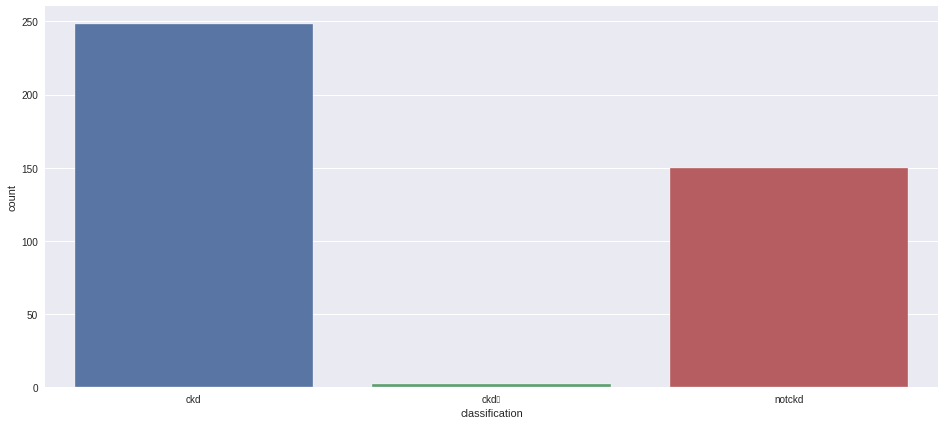

In [ ]:
fig,ax = plt.subplots(figsize=(16,7))
sns.countplot(x='classification',data=df)

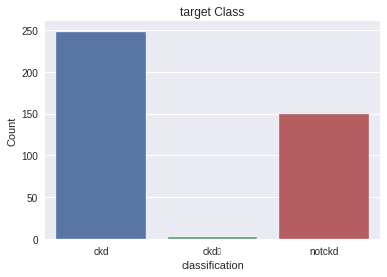

Percent of chronic kidney disease sample:  62.0 %
Percent of not a chronic kidney disease sample:  37.5 %


In [ ]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

In [ ]:

#transfrom the non numerical data in the columns. to do that, we need to go back to the column and check the data data that are in  numerical value
for column in df.columns:
  if df[column].dtype == np.number:  #if it contain numerical value, we continue
    continue
  df[column] = LabelEncoder().fit_transform ( df[column] )  #encoder transform the values into numbers

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,32,72,31,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,...,26,56,46,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,46,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,18,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,25,0,3,1,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f270466a150>,
      dtype=object)

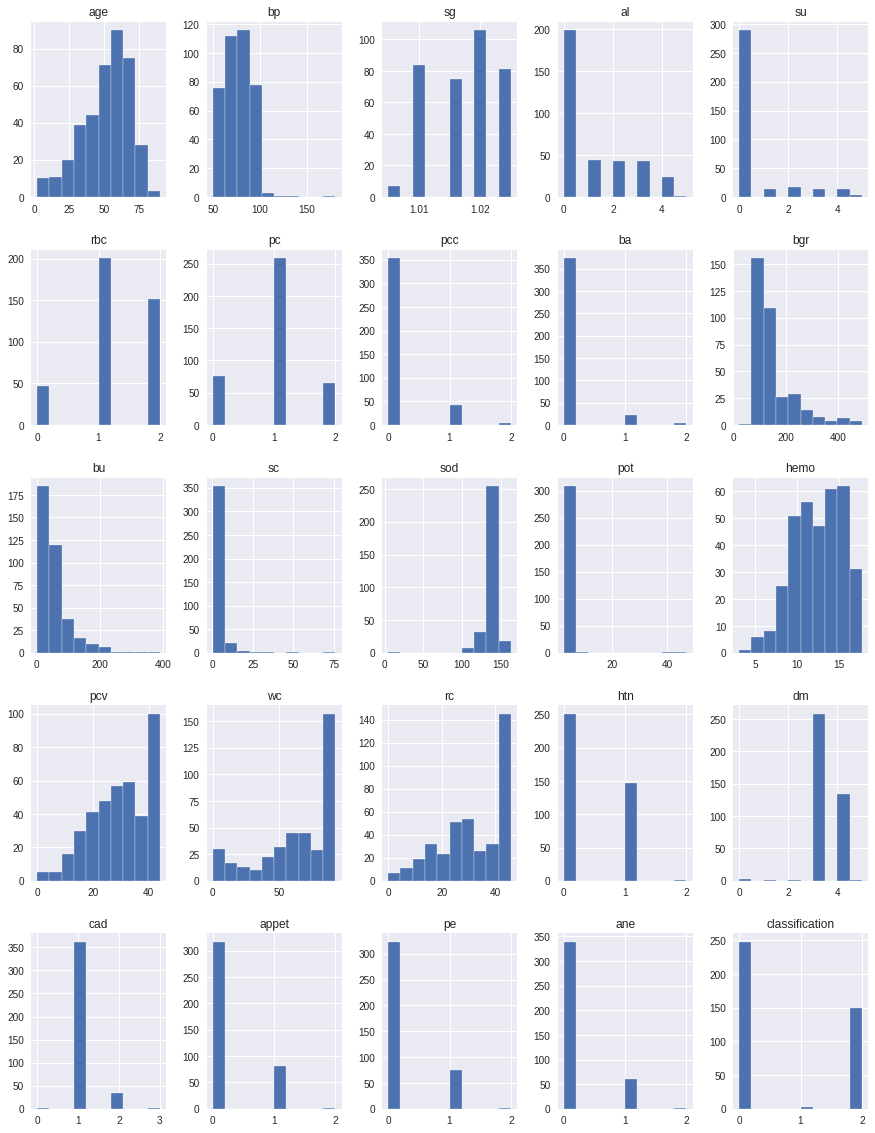

In [ ]:
#data visualisation in histogram 
df.hist(figsize = (15,20))

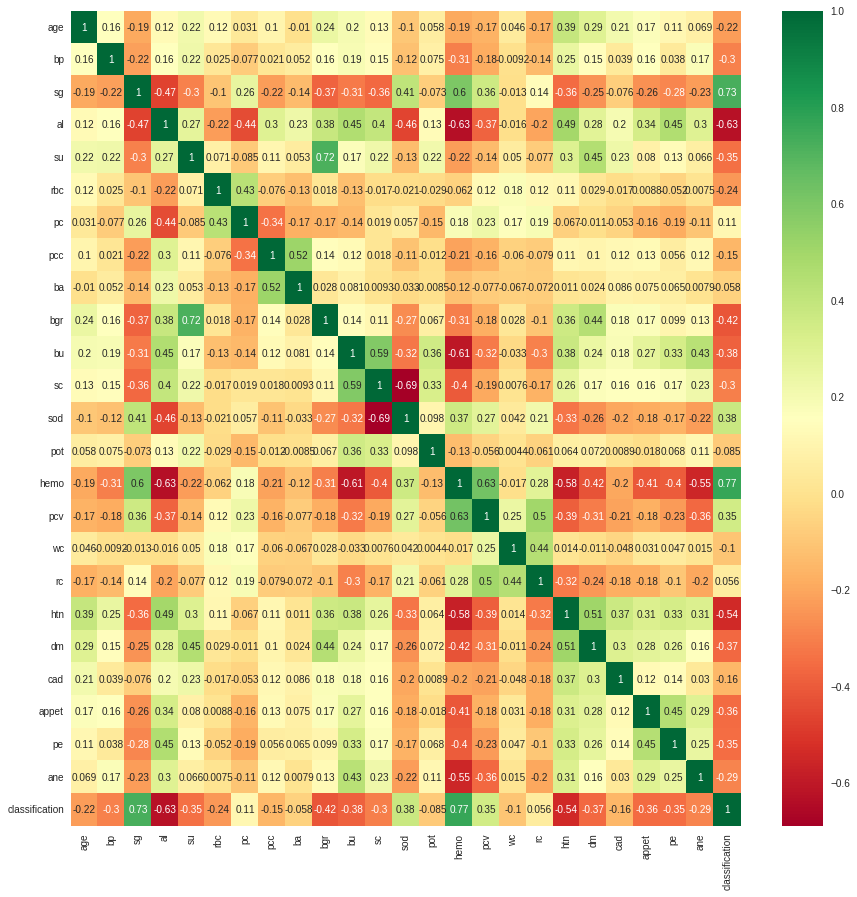

In [ ]:
#get correlations of each features in dataset
import seaborn as sn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#create  a list of  the col name to keep based on correlation
columns_to_retain =  ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

columns_to_retain

['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

In [ ]:
#now we have to create a new data set  without any other column except the column that we want to retain
#drop the columns that are not in columns to retain
#Drop the columns that are not in columns_2_retain. and create a new dataset
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1)
#drop the rows with na or missing values # or df = df.dropna(inplace=True)
df= df.dropna(axis = 0)

In [ ]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,32,1,0
1,1.020,4.0,0.8,11.3,26,0,0
2,1.010,2.0,1.8,9.6,19,0,0
3,1.005,4.0,3.8,11.2,20,1,0
4,1.010,2.0,1.4,11.6,23,0,0


In [ ]:
#transfrom the non numerical data in the columns. to do that, we need to go back to the column and check the data data that are in  numerical value
for column in df.columns:
  if df[column].dtype == np.number:  #if it contain numerical value, we continue
    continue
  df[column] = LabelEncoder().fit_transform ( df[column] )  #encoder transform the values into numbers

In [ ]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f270220dd10>,
      dtype=object)

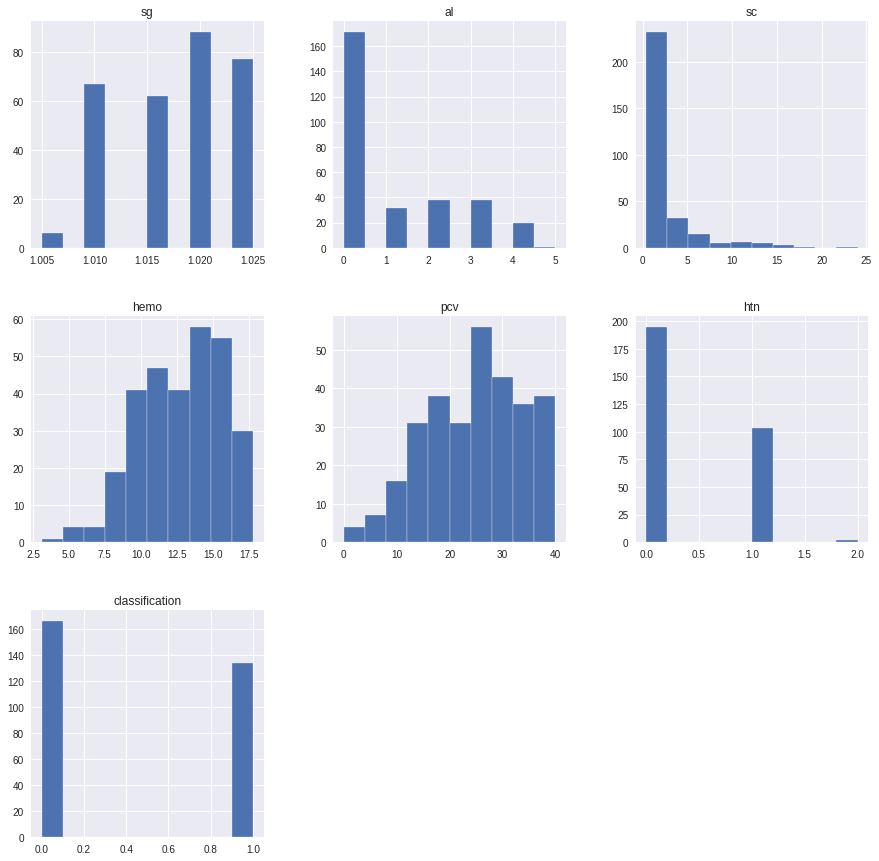

In [ ]:
#data visualisation in histogram 
df.hist(figsize = (15,15))

In [ ]:

df.shape

(300, 7)

In [ ]:
df.describe()

,sg,al,sc,hemo,pcv,htn,classification
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.017717,1.023333,2.487000,12.772000,24.023333,0.356667,0.446667
std,0.005772,1.364672,3.286956,2.832684,9.058863,0.493559,0.497978
min,1.005000,0.000000,0.400000,3.100000,0.000000,0.000000,0.000000
25%,1.015000,0.000000,0.800000,10.800000,17.000000,0.000000,0.000000
50%,1.020000,0.000000,1.200000,13.050000,25.000000,0.000000,0.000000
75%,1.025000,2.000000,2.500000,15.000000,31.000000,1.000000,1.000000
max,1.025000,5.000000,24.000000,17.800000,40.000000,2.000000,1.000000


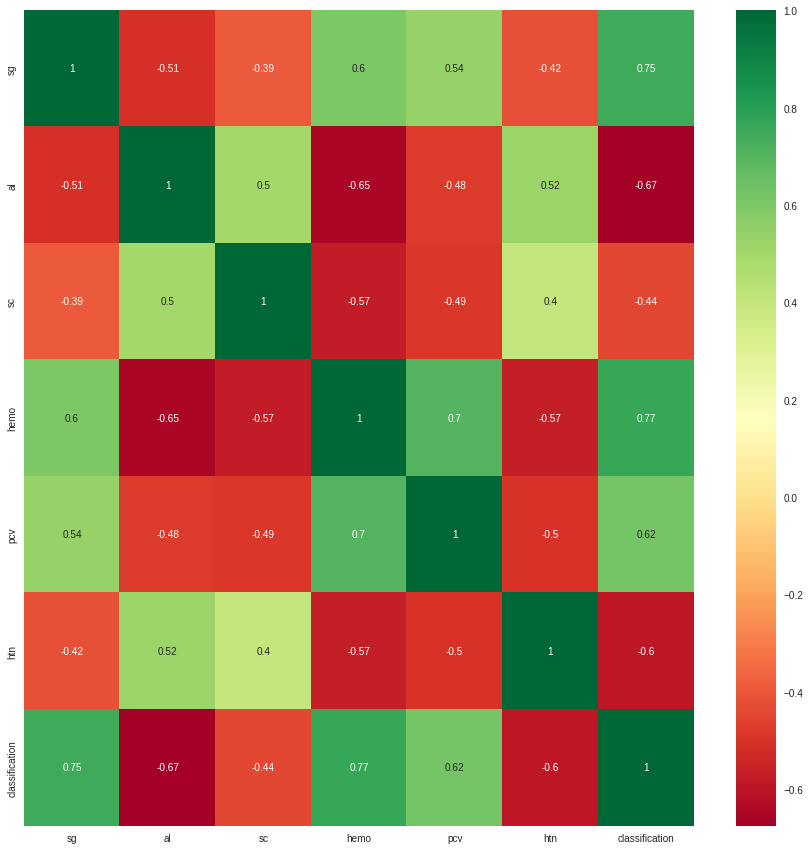

In [ ]:
#get correlations of each features in dataset
import seaborn as sn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

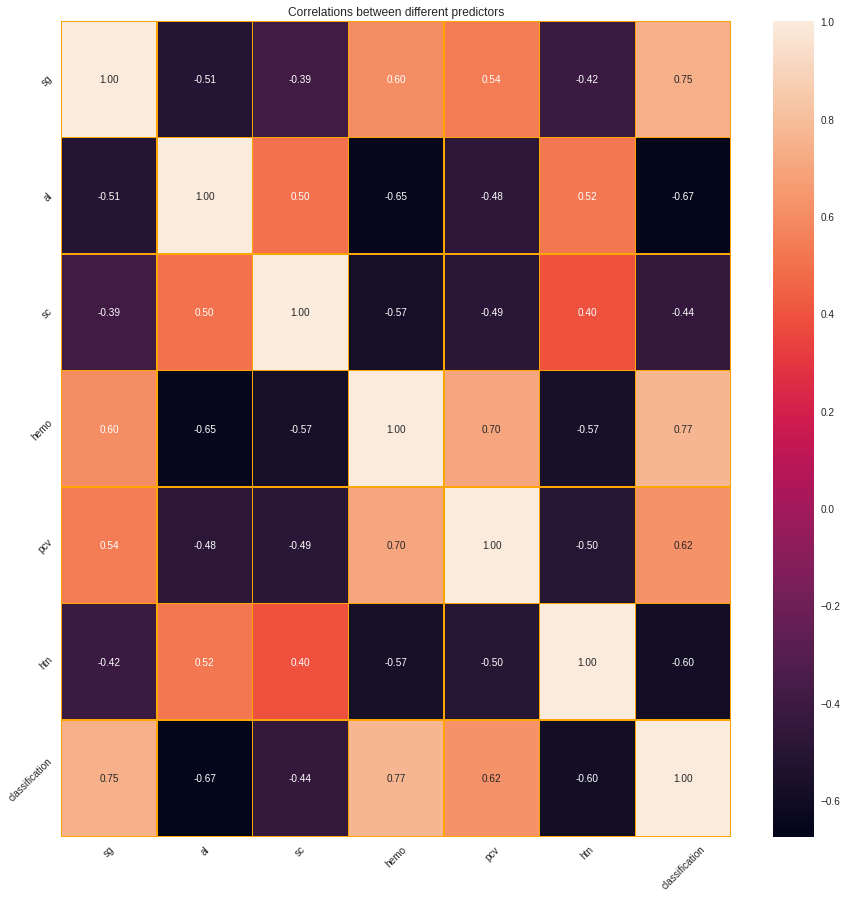

In [ ]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

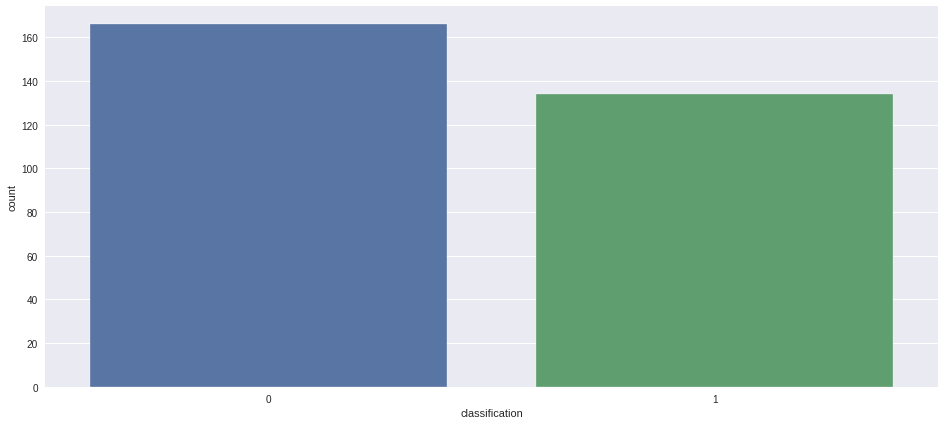

In [ ]:
#% of patients with ckd or not after feature selection
fig,ax = plt.subplots(figsize=(16,7))
sns.countplot(x='classification',data=df)

In [ ]:
#Positive Correlation
#hemoglobin -> red_blood_cell_count,packed_cell_volume, specific_gravity
#red_blood_cell_count -> packed_cell_volume,specific_gravity
#specific_gravity -> packed_cell_volume
#blood_glucose_random -> sugar
#serum_creatinine -> blood_urea
#Negative correlation
#Albumin -> hemoglobin, packed_cell_volume,specific_gravity,red_blood_cell_count
#serum_creatinine -> sodium
#blood_urea -> hemoglobin, packed_cell_volume,red_blood_cell_count

(0.0, 1.1252750302357986)

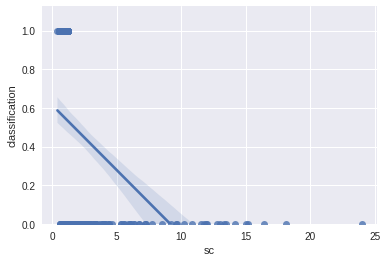

In [ ]:
# correlation btween taregt and independent variables
sns.regplot(x="sc", y="classification", data=df)
plt.ylim(0,)

In [ ]:
df[["htn", "classification"]].corr()

,htn,classification
htn,1.000000,-0.595919
classification,-0.595919,1.000000


(0.0, 1.085148988583069)

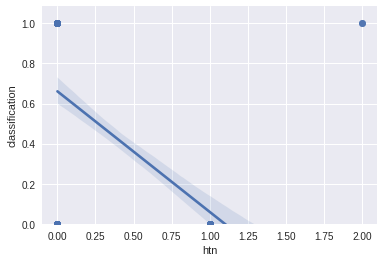

In [ ]:
sns.regplot(x="htn", y="classification", data=df)
plt.ylim(0,)

In [ ]:
#value counts of all data points
df.value_counts()

sg     al   sc   hemo  pcv  htn  classification
1.025  0.0  1.2  15.0  32   0    1                 2
1.010  2.0  3.4  13.0  24   1    0                 2
1.020  0.0  0.5  13.6  28   0    1                 2
1.005  0.0  0.9  10.0  13   1    0                 1
1.020  0.0  1.2  16.2  34   0    1                 1
                                                  ..
1.015  2.0  1.1  14.0  26   0    0                 1
                 12.4  28   0    0                 1
       1.0  7.3  13.1  25   0    0                 1
            6.1  7.5   11   0    0                 1
1.025  4.0  7.7  9.8   16   1    0                 1
Length: 297, dtype: int64

In [ ]:
# Statistical Analysis

In [ ]:
# Divide your dataset into Train (80 Percent) and Test (20 percent)

In [ ]:
#split the data into independent (x) data set (the features) and dependent (y) dataset (the target)
X= df.drop(['classification'], axis = 1) #to drop the column  classification
y= df['classification'] #ti contains all target that we want

In [ ]:
#feature scaling
#min-max scaler method sclaes the dataset so that all the input feautres lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#Split the data into 80% training and 20% testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [ ]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)

(240, 6)
(60, 6)


In [ ]:
#print the shape of the new y objects 287 total patients after dropping nan . 229 for tain 58 patients for testing
print (y_train.shape)
print (y_test.shape)

(240,)
(60,)


In [ ]:
#Deep Learning

In [ ]:
#build the model multi linear perceptron #256 neurons, len(X.columns)  is number of features in our dataset
mlp= Sequential()
mlp.add( Dense (256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation= 'relu') )
mlp.add( Dense(1, activation='hard_sigmoid') )

In [ ]:
#compile the model #crossentropy: fn used for binary classess or 2 classses yto classsify if a person has ckd or not
#loss fn measures how well the model does the training
#optimizer =adam
mlp.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#train the model
#epochs is the number of genration over the entire data set to train on
#batch size is the number of several graidient for training
history = mlp.fit(X_train, y_train, epochs = (250), batch_size = X_train.shape[0]) 

Epoch 1/250
1/1 [==============================] - 0s 306ms/step - loss: 0.6873 - accuracy: 0.8958
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6815 - accuracy: 0.8958
Epoch 3/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6758 - accuracy: 0.8500
Epoch 4/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6702 - accuracy: 0.8375
Epoch 5/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6646 - accuracy: 0.8250
Epoch 6/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6591 - accuracy: 0.8167
Epoch 7/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6538 - accuracy: 0.8167
Epoch 8/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6485 - accuracy: 0.8167
Epoch 9/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6433 - accuracy: 0.8167
Epoch 10/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6381 - accuracy: 0.8167
Epoch 11/250
1/1 [=====

In [ ]:
#save the model
mlp.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model/assets


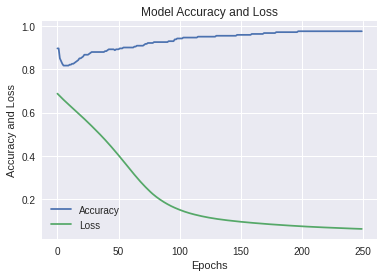

In [ ]:
#visualise the model loss and accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
#to check if the patient has ckd or not
#get the shape of the training and the testing data
#training data 229 pateints rows and 6 colums datapoints
#test data 58 pateints row and 6 colums datapoints

print('shape of the training data:', X_train.shape)
print('shape of the test data', X_test.shape)


shape of the training data: (240, 6)
shape of the test data (60, 6)


In [ ]:
#to see how the model preidcts and diagnos patients
mlp_pred= mlp.predict(X_test)
mlp_pred= [1 if y>=0.5 else 0 for y in mlp_pred] #when using ANN , we can get probability and make 1 if y>=0.5 else 0. 0.5 is the threshold
mlp_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1]

In [ ]:
#show the actual values. if the patient actually has ckd or not
y_test

297    1
39     0
243    0
239    0
91     0
115    0
51     0
12     0
87     0
33     0
26     0
189    0
76     0
94     0
62     0
53     0
258    1
32     0
169    0
296    1
144    0
387    1
271    1
185    0
114    0
159    0
63     0
301    1
206    0
263    1
9      0
154    0
80     0
248    0
207    0
20     0
150    0
135    0
290    1
339    1
240    0
214    0
390    1
371    1
29     0
349    1
173    0
199    0
333    1
3      0
129    0
152    0
79     0
182    0
96     0
170    0
250    1
282    1
90     0
266    1
Name: classification, dtype: int64

In [ ]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in mlp_pred)))

Original: 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1
Predicted: 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1


In [ ]:
from sklearn.metrics import accuracy_score
mlp_acc = round(accuracy_score(y_test, mlp_pred)*100, 2)
print(f'Multi Layer Perceptron Model Accuracy: {mlp_acc}%')

Multi Layer Perceptron Model Accuracy: 95.0%


In [ ]:

# from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_theme(style="whitegrid")
style.use('seaborn')

In [ ]:
model_conf_matrix = confusion_matrix(y_test, mlp_pred)
model_conf_matrix

array([[42,  2],
       [ 1, 15]])

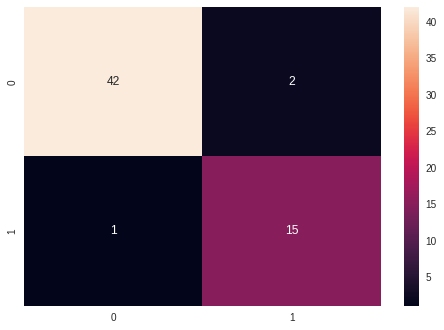

In [ ]:
sns.heatmap(model_conf_matrix, annot=True)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 40
False Pos: 2
False Neg: 1
True Pos: 32


In [ ]:
from sklearn.metrics import classification_report
mlp_classification_report = classification_report(y_test, mlp_pred)
print(mlp_classification_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.88      0.94      0.91        16

    accuracy                           0.95        60
   macro avg       0.93      0.95      0.94        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.iloc[:,:-1]
y = df['classification']

logreg = LogisticRegression(max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

Train Accuracy:  0.9733333333333334
Test Accuracy:  0.96


In [ ]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

Logistic Regression: 96.0%


In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

Original: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1
Predicted: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1


In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

array([[40,  2],
       [ 1, 32]])

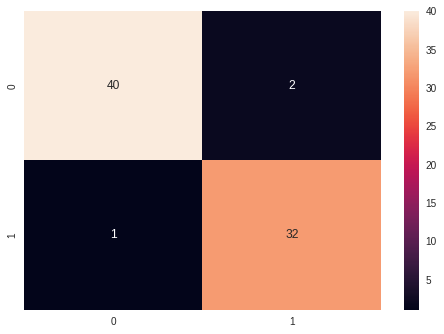

In [ ]:
sns.heatmap(logreg_conf_matrix, annot=True)

In [ ]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.94      0.97      0.96        33

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 40
False Pos: 2
False Neg: 1
True Pos: 32


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.94      0.97      0.96        33

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [ ]:
#random forest
rf = RandomForestClassifier(max_depth=20, n_estimators=21)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=21)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
rf_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in rf_pred)))

Original: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1
Predicted: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1


In [ ]:
# Checking Model prediction accuracy
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
print(f'Random Forest Accuracy: {rf_acc}%')

Random Forest Accuracy: 100.0%


In [ ]:
from sklearn.model_selection import cross_val_score

rf_accuracy = []
for n in range(10, 30):
	rf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rf, X, y, cv=10)
	rf_accuracy.append(round(acc.mean()*100, 2))
rf_accuracy

[99.67,
 99.67,
 100.0,
 99.33,
 100.0,
 100.0,
 100.0,
 99.67,
 100.0,
 99.33,
 99.67,
 99.67,
 100.0,
 99.67,
 99.67,
 99.67,
 100.0,
 100.0,
 100.0,
 100.0]

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_conf_matrix

array([[42,  0],
       [ 0, 33]])

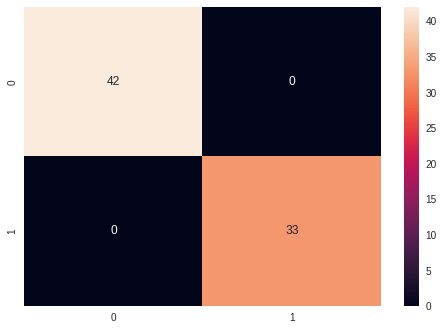

In [ ]:
sns.heatmap(rf_conf_matrix, annot=True)

In [ ]:
rf_classification_report = classification_report(y_test, rf_pred)
print(rf_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        33

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [ ]:
# SVM -> SVC Model [Support Vector Classifier]

In [ ]:
from sklearn.svm import SVC


In [ ]:
svc = SVC(C=1.5)

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1.5)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accuracy: {svc_acc}%')

SVM Accuracy: 94.67%


In [ ]:
svc_conf_matrix = confusion_matrix(y_test, svc_pred)
svc_conf_matrix

array([[38,  4],
       [ 0, 33]])

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in svc_pred)))

Original: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1
Predicted: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1


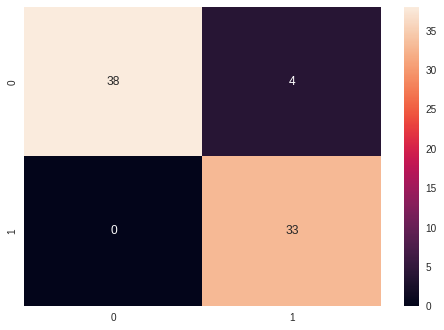

In [ ]:
sns.heatmap(svc_conf_matrix, annot=True)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 40
False Pos: 2
False Neg: 1
True Pos: 32


In [ ]:
svc_classification_report = classification_report(y_test, svc_pred)
print(svc_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.89      1.00      0.94        33

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [ ]:
 # Decision tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100, 2)
print(f'Decision Tree Classifier Accuracy: {dtc_acc}%')

Decision Tree Classifier Accuracy: 100.0%


In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in dtc_pred)))

Original: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1
Predicted: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1


In [ ]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)
dtc_conf_matrix

array([[42,  0],
       [ 0, 33]])

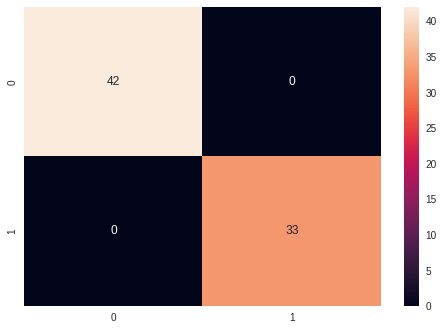

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)

In [ ]:
dtc_classification_report = classification_report(y_test, dtc_pred)
print(dtc_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        33

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [ ]:
#logistics regression train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

Logistic Regression: 96.0%


In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

Original: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1
Predicted: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1


In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

array([[40,  2],
       [ 1, 32]])

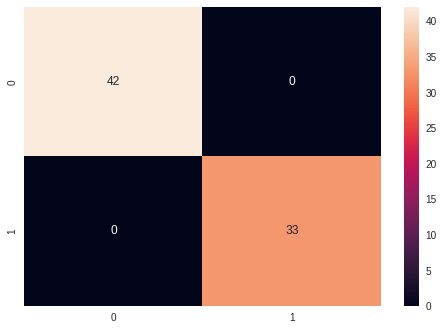

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)

In [ ]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.94      0.97      0.96        33

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
# Checking Model prediction accurecy
knn_acc = round(accuracy_score(y_test, knn_pred)*100, 2)
print(f'KNN Accuracy {knn_acc}%')

KNN Accuracy 94.67%


In [ ]:
#Tuning KNN Model Accurecy using 10-fold cross validation, n_neighbors
from sklearn.model_selection import cross_val_score

accuracy = []
for n in range(1, 20):
	knn = KNeighborsClassifier(n_neighbors=n)
	acc = cross_val_score(knn, X, y, cv=11)
	accuracy.append(round(acc.mean()*100, 2))

In [ ]:
accuracy

[96.63,
 96.63,
 95.97,
 96.31,
 95.0,
 95.32,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 94.66,
 95.0,
 94.66,
 94.66,
 94.66,
 94.66,
 93.99]

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_conf_matrix

array([[38,  4],
       [ 0, 33]])

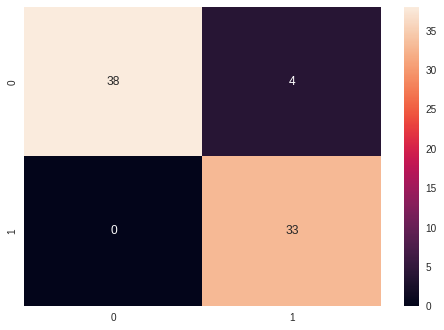

In [ ]:
sns.heatmap(knn_conf_matrix, annot=True)

In [ ]:
knn_classification_report = classification_report(y_test, knn_pred)
print(knn_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.89      1.00      0.94        33

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#model comparison

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 'Multi Layer Perceptron (ANN)', 'SVC', 'Logreg'],
    'Score' : [ dtc_acc, rf_acc,  mlp_acc, svc_acc, knn_acc, logreg_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Decision Tree Classifier,100.00
1,Random Forest Classifier,100.00
5,Logreg,96.00
2,KNN,95.00
3,Multi Layer Perceptron (ANN),94.67
4,SVC,94.67


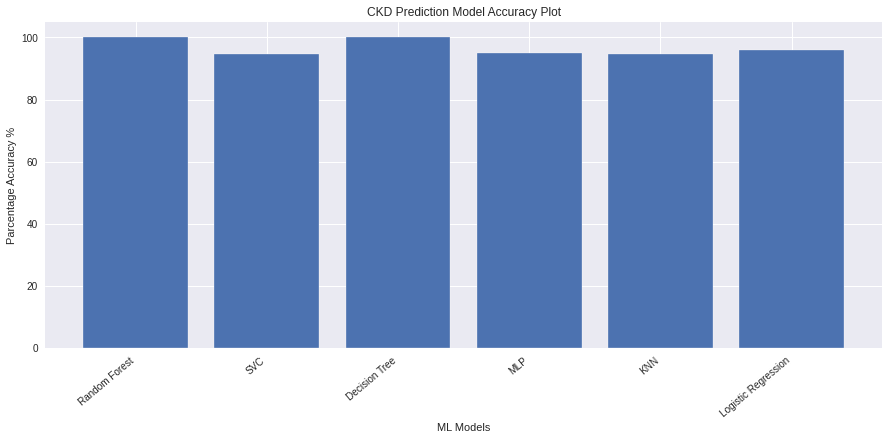

In [ ]:
plt.figure(figsize=(15, 6))
models = ['Random Forest', 'SVC', 'Decision Tree', 'MLP', 'KNN', 'Logistic Regression']
models_acc = [rf_acc, svc_acc,  dtc_acc, mlp_acc, knn_acc, logreg_acc]
#xax = [1, 2, 3, 4, 5, 6]
plt.title('CKD Prediction Model Accuracy Plot')
plt.bar(models, models_acc, label=models)
plt.xticks(models, rotation=40, ha='right')
plt.ylabel('Parcentage Accuracy %')
plt.xlabel('ML Models')
#plt.legend()

#plt.savefig('figName.png', dpi=400)
plt.show()

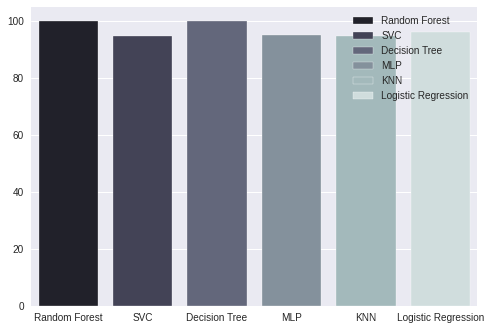

In [ ]:
sns.barplot(models, models_acc, palette="bone", hue=models, dodge=False)

In [ ]:
#TESTING BEST MODEL FOR PREDICTION
from sklearn.model_selection import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
 

In [ ]:
#Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 

# Setting up a primitive (non-validated) model
mlp = MLPClassifier(random_state = 0)# ANN model object created

mlp.fit(X_train, y_train) # ANN model object fit

MLPClassifier(random_state=0)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

def plotCurves(Xtrain,ytrain,Xval,yval):
    solver=["lbfgs", "sgd", "adam"]
    for i in solver:
        mlp=MLPRegressor(activation='relu',max_iter=1000,solver=i)
        mlp.fit(Xtrain,ytrain)
        pred=mlp.predict(Xval)
        print (mlp.score(Xval,yval))
        pd.DataFrame(mlp.loss_curve_).plot()

In [ ]:
from sklearn.model_selection import GridSearchCV




mlp = MLPClassifier(random_state = 0) # ANN model object created

In [ ]:
# Model CV process
mlp_cv_model = GridSearchCV(mlp, mlp_params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

mlp_cv_model.fit(X_train, y_train) 

NameError: ignored

In [ ]:
# Model Tuning
# Setting the Final Model with the best parameter

mlp_tuned = mlp_cv_model.best_estimator_

# Fitting Final Model
mlp_tuned.fit(X_train, y_train)

NameError: ignored

In [ ]:
# Tune Model Prediction
# Prediction process of Final Model over test set
y_pred = mlp_tuned.predict(X_test)

NameError: ignored

In [ ]:
#%% ROC-AUC Curve

y_score = mlp_tuned.predict_proba(X_test)

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class

NameError: ignored

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [ ]:
#Prediction Probabilities

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
mlp_probs = mlp.predict_proba(X_test)

In [ ]:
#Probabilities for the positive outcome is kept.

In [ ]:
mlp_probs = mlp_probs[:, 1]

In [ ]:
#Computing AUROC and ROC curve values

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#Calculate AUROC
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

In [ ]:
#Print AUROC scores

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('MLP: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500


NameError: ignored

In [ ]:
#Calculate ROC curve

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

NameError: ignored

NameError: ignored

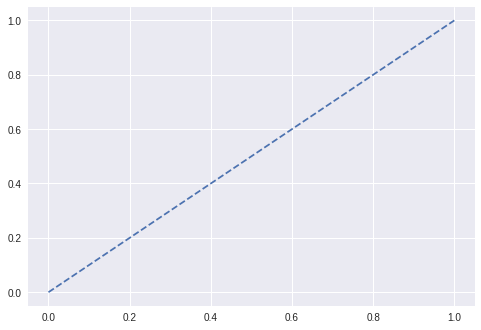

In [ ]:
#plot the ROC curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP (AUROC = %0.3f)' % mlp_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)

In [ ]:
#Prediction Probabilities

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)

In [ ]:
#Probabilities for the positive outcome is kept.

In [ ]:
rf_probs = rf_probs[:, 1]


In [ ]:
#Computing AUROC and ROC curve values

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#Calculate AUROC
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
#Print AUROC scores

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 1.000


In [ ]:
#Calculate ROC curve

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
#Plot the ROC curve
import matplotlib.pyplot as plt

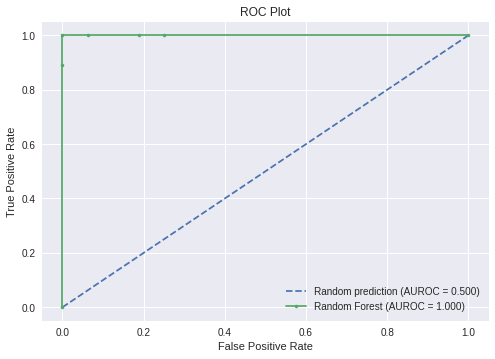

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
#to check the simulation of the highest performing model
#create a dataframe
d= {'sg': [1.020, 1.020, 1.010, 0.005], 'htn': [1, 0, 0, 1], 'dm': [2, 1, 2, 1,],'hemo': pd.Series([15.4, 11.3, 9.6,11.2], index=[0, 1, 2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

,sg,htn,dm,hemo
0,1.020,1,2,15.4
1,1.020,0,1,11.3
2,1.010,0,2,9.6
3,0.005,1,1,11.2


In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in rf_pred)))

Original: 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0
Predicted: 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1


In [ ]:
# Checking Model prediction accuracy
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
print(f'Random Forest Accuracy: {rf_acc}%')

ValueError: ignored

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
[[21  0]
 [ 0 29]]


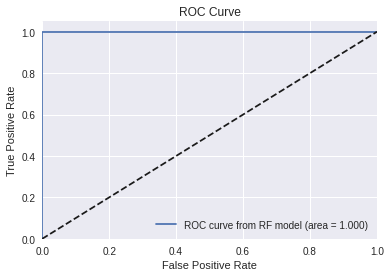

Best parameters:
{'class_weight': None, 'max_depth': 3, 'n_estimators': 8, 'random_state': 42}


In [ ]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_

In [ ]:
#Cleaning and preprocessing of data for training a classifier

In [ ]:
# Map text to 1/0 and do some cleaning
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)

In [ ]:
# Further cleaning
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#Check the portion of rows with NaN
#Now the data is cleaned with improper values labelled NaN. Let's see how many NaNs are there.
#Drop all the rows with NaN values, and build a model out of this dataset (i.e. df2)

In [ ]:
df = df.dropna(axis=0)
df['class'].value_counts()

0.0    115
1.0     43
Name: class, dtype: int64

In [ ]:
#Examine correlations between different features

In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
#graphical analysis with intepreteation

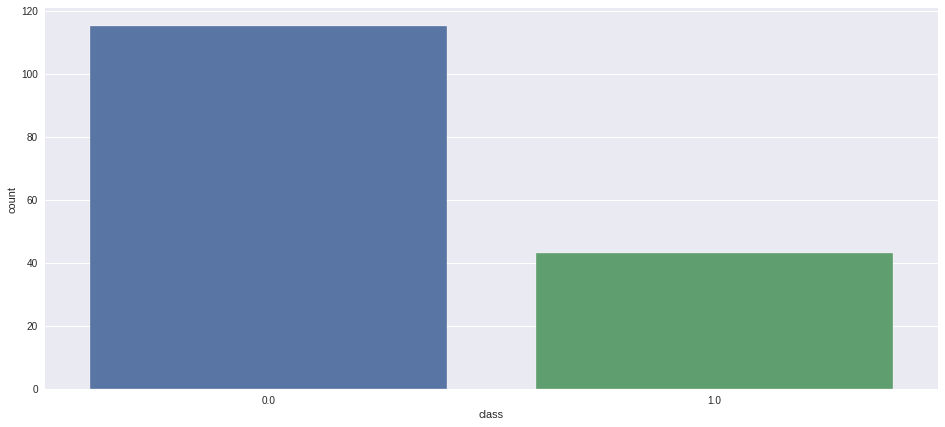

In [ ]:
fig,ax = plt.subplots(figsize=(16,7))
sns.countplot(x='class',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# Key Descriptive Statistics with interpretation

In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
#checking fro missing variables

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# Graphical analysis with interpretation

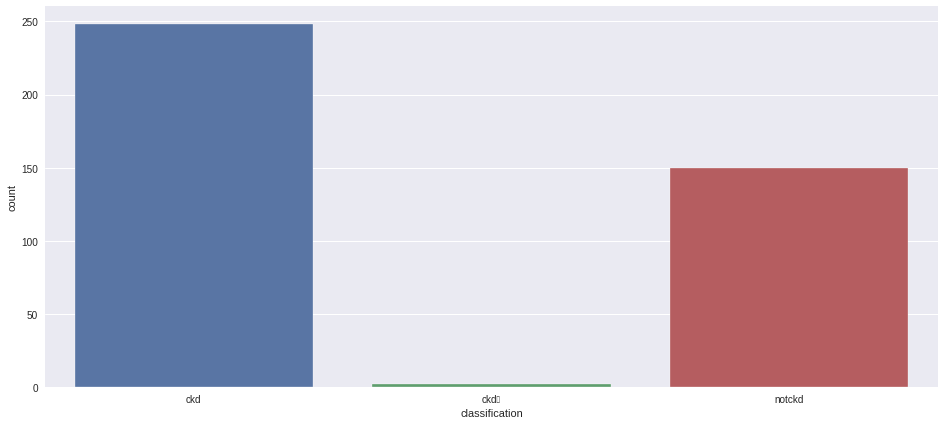

In [ ]:
fig,ax = plt.subplots(figsize=(16,7))
sns.countplot(x='classification',data=df)

In [ ]:
df.shape

(400, 26)

In [ ]:
#transfrom the non numerical data in the columns. to do that, we need to go back to the column and check the data data that are in  numerical value
for column in df.columns:
  if df[column].dtype == np.number:  #if it contain numerical value, we continue
    continue
  df[column] = LabelEncoder().fit_transform ( df[column] )  #encoder transform the values into numbers

In [ ]:
#Data visualization in histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56e6613050>,
      dtype=object)

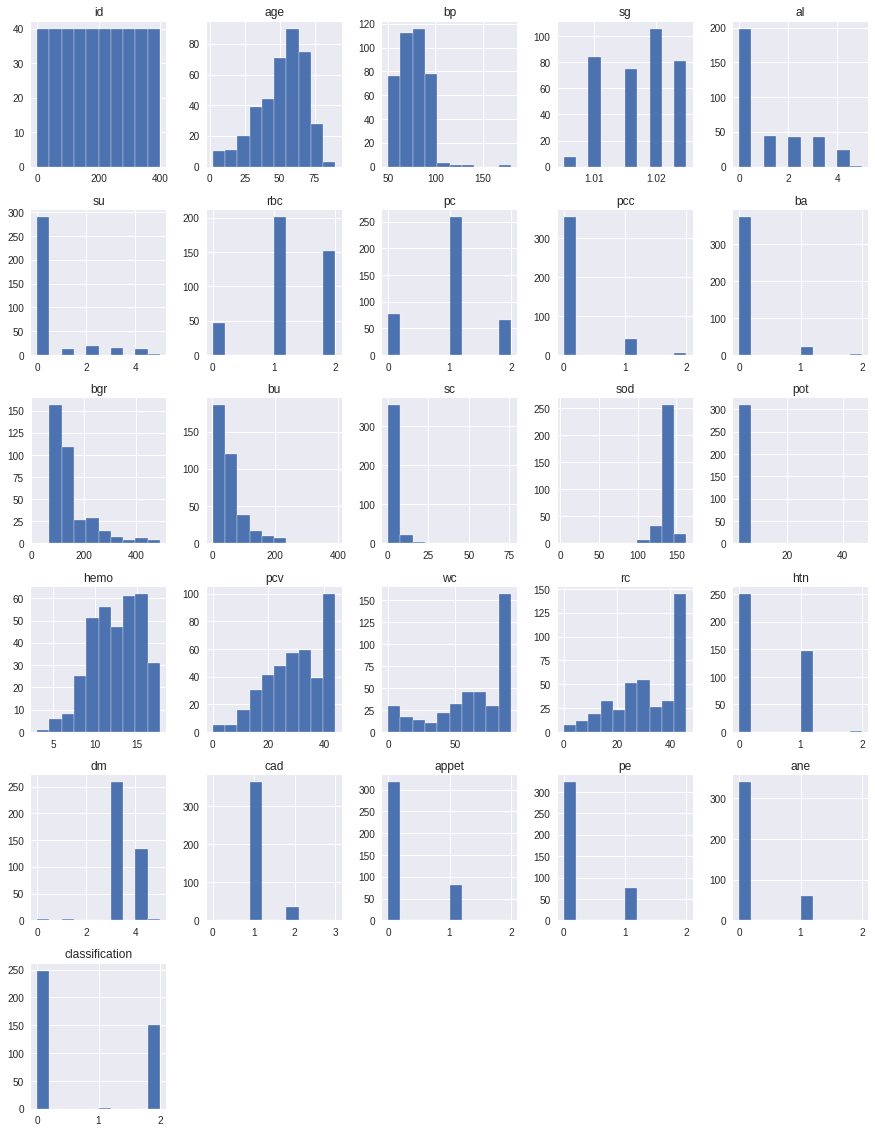

In [ ]:
df.hist(figsize = (15,20))

In [ ]:
#get the shape of the data (the no of rows and columns) #each row represents a patient
df.shape

(400, 26)

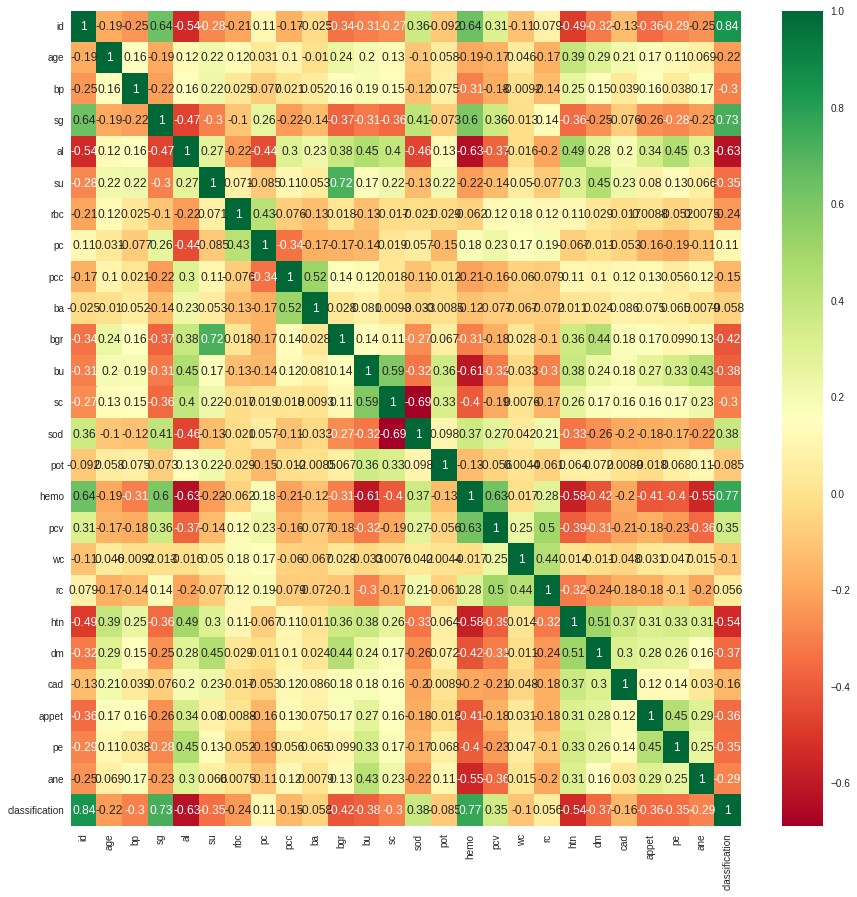

In [ ]:
#get correlations of each features in dataset
import seaborn as sn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#means 400 patients with 26 diff datapoints on each patients

In [ ]:
#create  a list of  the col name to keep
columns_to_retain =  ['sg', 'al', 'sc', 'hemo', 'pot', 'pcv', 'dm', 'wbcc', 'rbcc', 'htn', 'classification']

columns_to_retain

['sg',
 'al',
 'sc',
 'hemo',
 'pot',
 'pcv',
 'dm',
 'wbcc',
 'rbcc',
 'htn',
 'classification']

In [ ]:
#now we have to create a new data set  without any other column except the column that we want to retain
#drop the columns that are not in columns to retain
#Drop the columns that are not in columns_2_retain. and create a new dataset
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1)
#drop the rows with na or missing values # or df = df.dropna(inplace=True)
df= df.dropna(axis = 0)

In [ ]:
df.head()

,sg,al,sc,hemo,pcv,htn,dm,classification
0,1.020,1.0,1.2,15.4,27,1,2,0
1,1.020,4.0,0.8,11.3,21,0,1,0
2,1.010,2.0,1.8,9.6,14,0,2,0
3,1.005,4.0,3.8,11.2,15,1,1,0
4,1.010,2.0,1.4,11.6,18,0,1,0


In [ ]:
df.shape

(295, 8)

In [ ]:
#transfrom the non numerical data in the columns. to do that, we need to go back to the column and check the data data that are in  numerical value
for column in df.columns:
  if df[column].dtype == np.number:  #if it contain numerical value, we continue
    continue
  df[column] = LabelEncoder().fit_transform ( df[column] )  #encoder transform the values into numbers

In [ ]:
df.head() #to view the first five rows of new cleaned data

,sg,al,sc,hemo,pcv,htn,dm,classification
0,1.020,1.0,1.2,15.4,27,1,2,0
1,1.020,4.0,0.8,11.3,21,0,1,0
2,1.010,2.0,1.8,9.6,14,0,2,0
3,1.005,4.0,3.8,11.2,15,1,1,0
4,1.010,2.0,1.4,11.6,18,0,1,0


In [ ]:
df.shape

(295, 8)

In [ ]:
df.describe()

,sg,al,sc,hemo,pcv,htn,dm,classification
count,295.00000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,1.01778,1.013559,2.468136,12.832881,23.230508,0.352542,1.315254,0.454237
std,0.00578,1.362703,3.297629,2.797309,8.944714,0.492583,0.486838,0.498747
min,1.00500,0.000000,0.400000,3.100000,0.000000,0.000000,0.000000,0.000000
25%,1.01500,0.000000,0.800000,10.900000,16.000000,0.000000,1.000000,0.000000
50%,1.02000,0.000000,1.200000,13.200000,24.000000,0.000000,1.000000,0.000000
75%,1.02500,2.000000,2.500000,15.000000,30.500000,1.000000,2.000000,1.000000
max,1.02500,5.000000,24.000000,17.800000,39.000000,2.000000,3.000000,1.000000


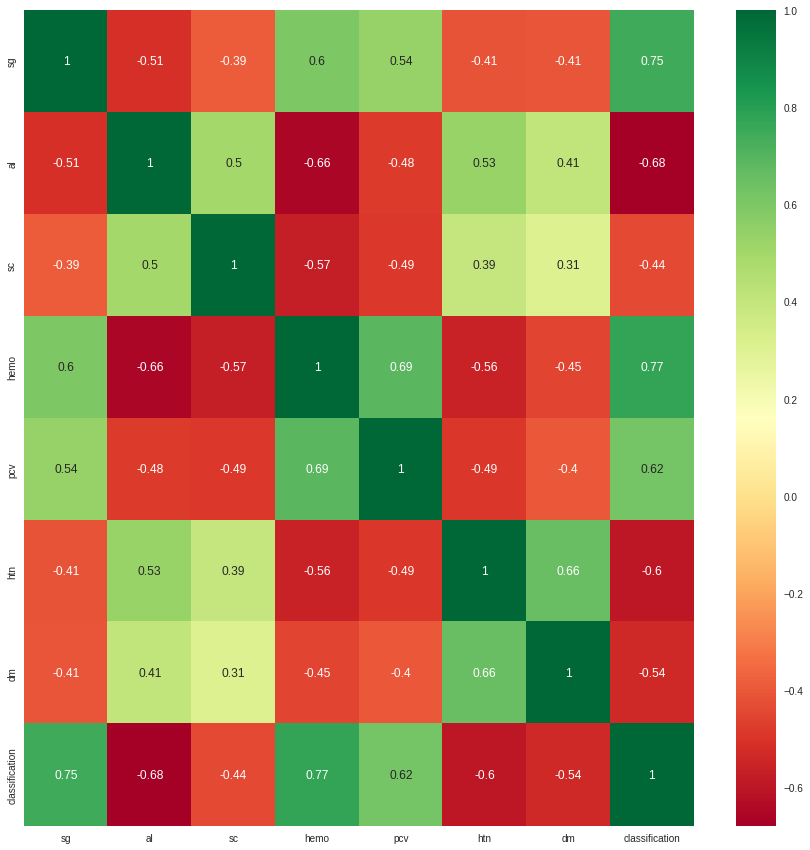

In [ ]:
#get correlations of each features in dataset
import seaborn as sn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df.corr()

,sg,al,sc,hemo,pcv,htn,dm,classification
sg,1.000000,-0.512251,-0.387782,0.603077,0.535631,-0.411094,-0.409205,0.746368
al,-0.512251,1.000000,0.496787,-0.659617,-0.477715,0.529983,0.408825,-0.679712
sc,-0.387782,0.496787,1.000000,-0.570178,-0.485305,0.389927,0.306072,-0.443255
hemo,0.603077,-0.659617,-0.570178,1.000000,0.689168,-0.559904,-0.450967,0.771608
pcv,0.535631,-0.477715,-0.485305,0.689168,1.000000,-0.494047,-0.399479,0.620711
htn,-0.411094,0.529983,0.389927,-0.559904,-0.494047,1.000000,0.655478,-0.598667
dm,-0.409205,0.408825,0.306072,-0.450967,-0.399479,0.655478,1.000000,-0.535737
classification,0.746368,-0.679712,-0.443255,0.771608,0.620711,-0.598667,-0.535737,1.000000


(0.0, 1.1240840948539865)

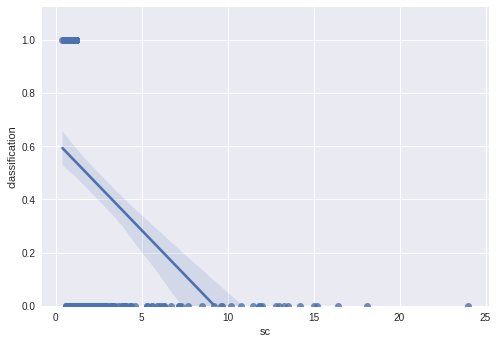

In [ ]:
# correlation btween taregt and independent variables
sns.regplot(x="sc", y="classification", data=df)
plt.ylim(0,)

In [ ]:
df[["dm", "classification"]].corr()

,dm,classification
dm,1.000000,-0.535737
classification,-0.535737,1.000000


(0.0, 1.450674200616138)

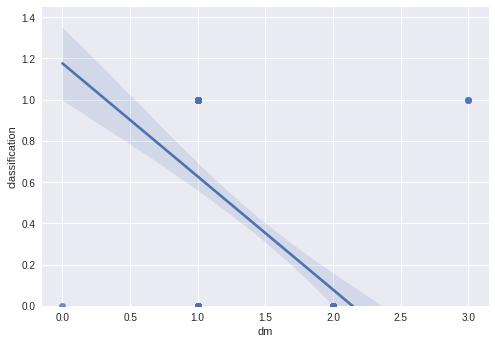

In [ ]:
sns.regplot(x="dm", y="classification", data=df)
plt.ylim(0,)

In [ ]:
df[["htn", "classification"]].corr()

,htn,classification
htn,1.000000,-0.598667
classification,-0.598667,1.000000


(0.0, 1.0854591836734695)

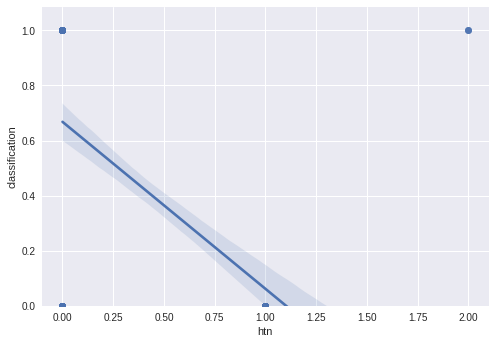

In [ ]:
sns.regplot(x="htn", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.1993420181365229)

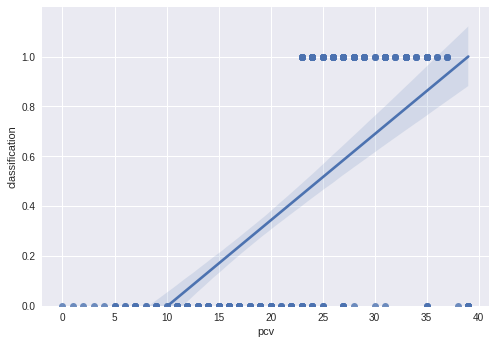

In [ ]:
sns.regplot(x="pcv", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.319150232273632)

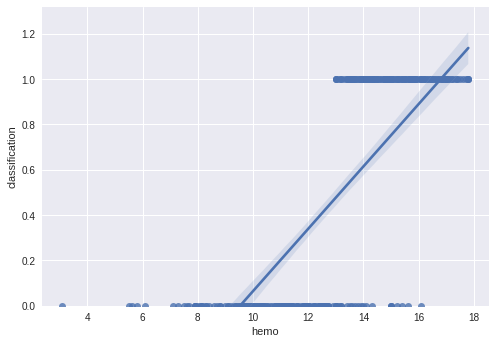

In [ ]:
sns.regplot(x="hemo", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.0714293246841073)

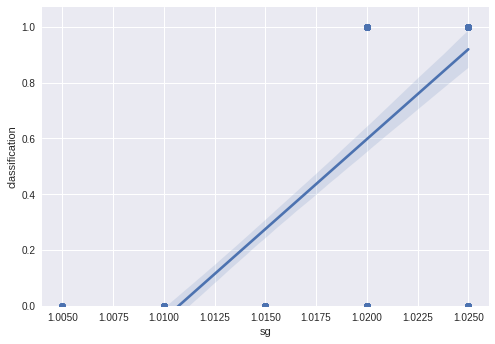

In [ ]:
sns.regplot(x="sg", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.0816023264044377)

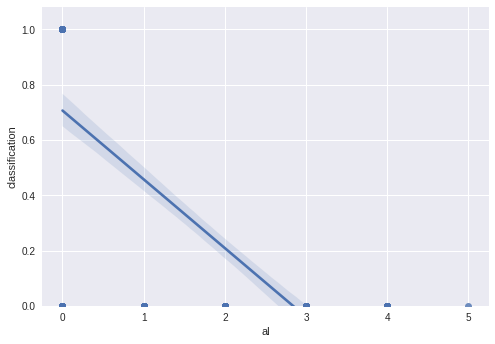

In [ ]:
sns.regplot(x="al", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.1258005355670138)

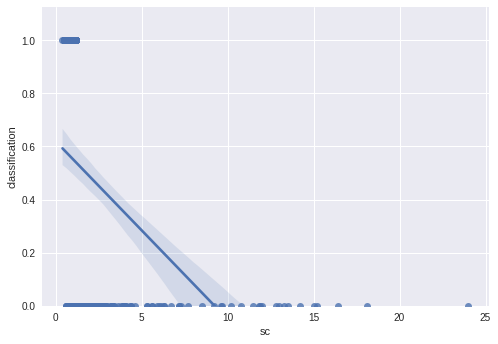

In [ ]:
sns.regplot(x="sc", y="classification", data=df)
plt.ylim(0,)

In [ ]:

#value counts of all data points
df.value_counts()

sg     al   sc   hemo  pcv  htn  dm  classification
1.025  0.0  1.2  15.0  31   0    1   1                 2
1.020  0.0  0.5  13.6  27   0    1   1                 2
1.005  0.0  0.9  10.0  12   1    2   0                 1
1.020  1.0  1.2  15.4  27   1    2   0                 1
            0.6  12.0  17   0    1   0                 1
                                                      ..
1.015  1.0  7.3  13.1  24   0    1   0                 1
            6.1  7.5   10   0    1   0                 1
            2.8  11.2  17   1    2   0                 1
            2.2  10.0  15   1    2   0                 1
1.025  4.0  7.7  9.8   15   1    1   0                 1
Length: 293, dtype: int64

In [ ]:
# Statistical Analysis

# Divide your dataset into Train (80 Percent) and Test (20 percent)

In [ ]:
#split the data into independent (x) data set (the features) and dependent (y) dataset (the target)
X= df.drop(['classification'], axis = 1) #to drop the column  classification
y= df['classification'] #ti contains all target that we want

In [ ]:

#feature scaling
#min-max scaler method sclaes the dataset so that all the input feautres lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#Split the data into 80% training and 20% testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [ ]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)


(236, 7)
(59, 7)


In [ ]:
#print the shape of the new y objects 287 total patients after dropping nan . 229 for tain 58 patients for testing
print (y_train.shape)
print (y_test.shape)

(236,)
(59,)


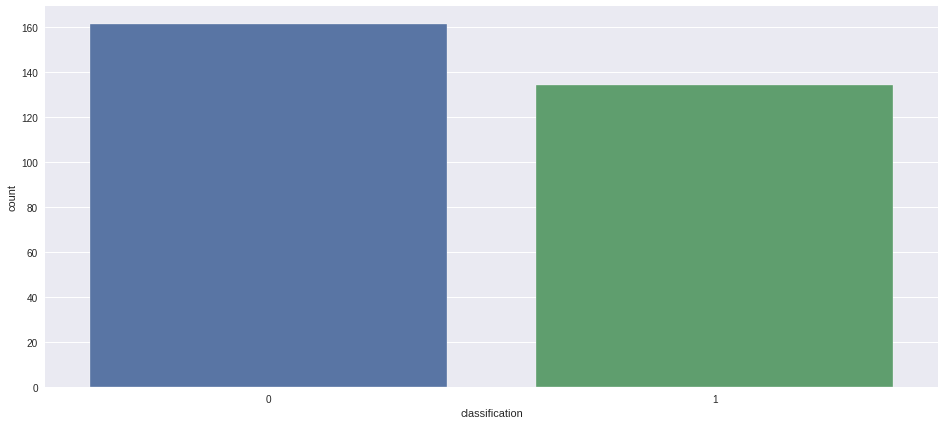

In [ ]:
fig,ax = plt.subplots(figsize=(16,7))
sns.countplot(x='classification',data=df)

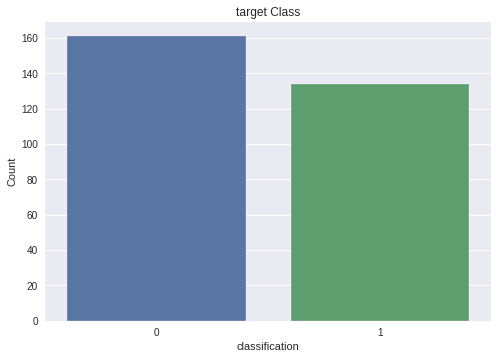

Percent of chronic kidney disease sample:  0.0 %
Percent of not a chronic kidney disease sample:  0.0 %


In [ ]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

In [ ]:

#build the model multi linear perceptron #256 neurons, len(X.columns)  is number of features in our dataset
mlp= Sequential()
mlp.add( Dense (256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation= 'relu') )
mlp.add( Dense(1, activation='hard_sigmoid') )

In [ ]:
#compile the model #crossentropy: fn used for binary classess or 2 classses yto classsify if a person has ckd or not
#loss fn measures how well the model does the training
#optimizer =adam
mlp.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#train the model
#epochs is the number of genration over the entire data set to train on
#batch size is the number of several graidient for training
history = mlp.fit(X_train, y_train, epochs = (1500), batch_size = X_train.shape[0]) 

Epoch 1/1500
1/1 [==============================] - 0s 14ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 2/1500
1/1 [==============================] - 0s 11ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 3/1500
1/1 [==============================] - 0s 11ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 4/1500
1/1 [==============================] - 0s 16ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 5/1500
1/1 [==============================] - 0s 16ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 6/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 7/1500
1/1 [==============================] - 0s 13ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 8/1500
1/1 [==============================] - 0s 11ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 9/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 10/1500
1/1 [==============================] - 0s 13ms/step - loss: 0.0061 - accuracy: 0.9958
Epoch 11/1

In [ ]:
#save the model
mlp.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model/assets


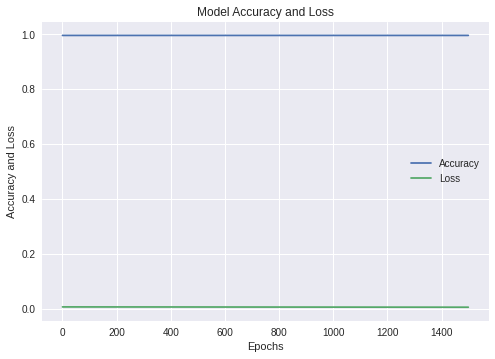

In [ ]:
#visualise the model loss and accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
#to check if the patient has ckd or not
#get the shape of the training and the testing data
#training data 229 pateints rows and 6 colums datapoints
#test data 58 pateints row and 6 colums datapoints

print('shape of the training data:', X_train.shape)
print('shape of the test data', X_test.shape)

shape of the training data: (236, 7)
shape of the test data (59, 7)


In [ ]:
#to see how the model preidcts and diagnos patients
mlp_pred= mlp.predict(X_test)
mlp_pred= [1 if y>=0.5 else 0 for y in mlp_pred] #when using ANN , we can get probability and make 1 if y>=0.5 else 0. 0.5 is the threshold
mlp_pred

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1]

In [ ]:
#show the actual values. if the patient actually has ckd or not
y_test

364    1
164    0
107    0
254    1
396    1
80     0
259    1
199    0
9      0
130    0
335    1
383    1
123    0
274    1
387    1
177    0
249    0
252    1
289    1
310    1
384    1
288    1
360    1
179    0
6      0
390    1
90     0
52     0
309    1
102    0
225    0
154    0
308    1
373    1
85     0
343    1
369    1
275    1
313    1
378    1
53     0
301    1
263    1
374    1
69     0
348    1
36     0
127    0
196    0
279    1
133    0
296    1
147    0
267    1
392    1
376    1
47     0
171    0
250    1
Name: classification, dtype: int64

In [ ]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in mlp_pred)))

Original: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1
Predicted: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1


In [ ]:
from sklearn.metrics import accuracy_score
mlp_acc = round(accuracy_score(y_test, mlp_pred)*100, 2)
print(f'Multi Layer Perceptron Model Accuracy: {mlp_acc}%')

Multi Layer Perceptron Model Accuracy: 98.31%


In [ ]:
# from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_theme(style="whitegrid")
style.use('seaborn')

In [ ]:
model_conf_matrix = confusion_matrix(y_test, mlp_pred)
model_conf_matrix

array([[25,  1],
       [ 0, 33]])

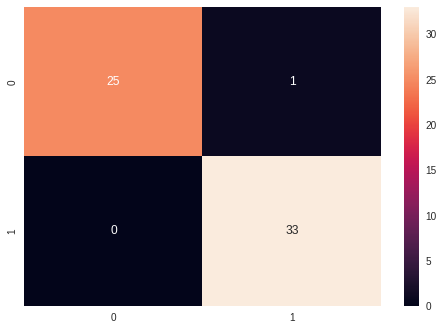

In [ ]:
sns.heatmap(model_conf_matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
mlp_classification_report = classification_report(y_test, mlp_pred)
print(mlp_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.97      1.00      0.99        33

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [ ]:
#random forest
rndf = RandomForestClassifier(max_depth=20, n_estimators=21)

In [ ]:
rndf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=21)

In [ ]:
rndf_pred = rndf.predict(X_test)

In [ ]:
rndf_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in rndf_pred)))

Original: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1
Predicted: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1


In [ ]:
# Checking Model prediction accuracy
rndf_acc = round(accuracy_score(y_test, rndf_pred)*100, 2)
print(f'Random Forest Accuracy: {rndf_acc}%')

Random Forest Accuracy: 98.31%


In [ ]:
from sklearn.model_selection import cross_val_score

rndf_accuracy = []
for n in range(10, 30):
	rndf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rndf, X, y, cv=10)
	rndf_accuracy.append(round(acc.mean()*100, 2))
rndf_accuracy

[99.67,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.66,
 99.66,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.67,
 99.66,
 100.0,
 100.0,
 100.0,
 100.0]

In [ ]:
rndf_conf_matrix = confusion_matrix(y_test, rndf_pred)
rndf_conf_matrix

array([[25,  1],
       [ 0, 33]])

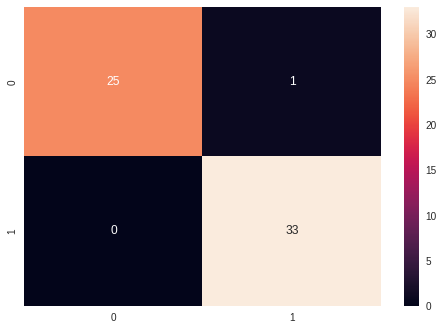

In [ ]:
sns.heatmap(rndf_conf_matrix, annot=True)

In [ ]:
rndf_classification_report = classification_report(y_test, rndf_pred)
print(rndf_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.97      1.00      0.99        33

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [ ]:
# SVM -> SVC Model [Support Vector Classifier]

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1.5)

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1.5)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accuracy: {svc_acc}%')

SVM Accuracy: 98.31%


In [ ]:
svc_conf_matrix = confusion_matrix(y_test, svc_pred)
svc_conf_matrix

array([[26,  0],
       [ 1, 32]])

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in svc_pred)))

Original: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1
Predicted: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1


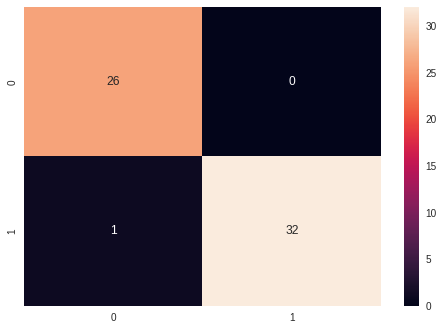

In [ ]:
sns.heatmap(svc_conf_matrix, annot=True)

In [ ]:
svc_classification_report = classification_report(y_test, svc_pred)
print(svc_classification_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.98        33

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [ ]:

# Decision tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100, 2)
print(f'Decision Tree Classifier Accuracy: {dtc_acc}%')

Decision Tree Classifier Accuracy: 100.0%


In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in dtc_pred)))

Original: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1
Predicted: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1


In [ ]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)
dtc_conf_matrix

array([[26,  0],
       [ 0, 33]])

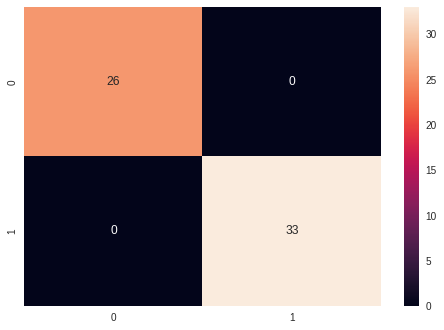

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)

In [ ]:
dtc_classification_report = classification_report(y_test, dtc_pred)
print(dtc_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        33

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [ ]:
#logistics regression train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

Logistic Regression: 96.61%


In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

Original: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1
Predicted: 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1


In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

array([[25,  1],
       [ 1, 32]])

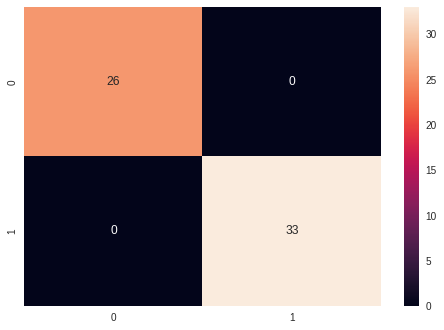

In [ ]:

sns.heatmap(dtc_conf_matrix, annot=True)

In [ ]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.97      0.97      0.97        33

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier', 'Multi Layer Perceptron (ANN)', 'SVC', 'Logreg'],
    'Score' : [ dtc_acc, rndf_acc,  mlp_acc, svc_acc, logreg_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Decision Tree Classifier,100.00
1,Random Forest Classifier,98.31
2,Multi Layer Perceptron (ANN),98.31
3,SVC,98.31
4,Logreg,96.61


In [ ]:
#model comparison

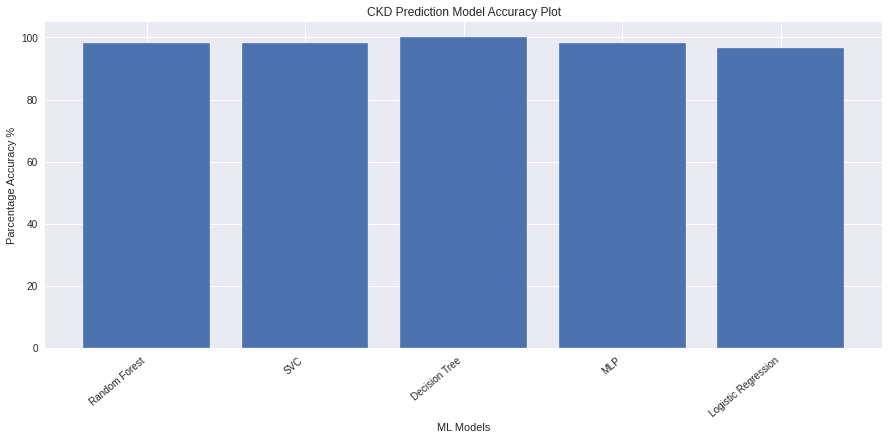

In [ ]:
plt.figure(figsize=(15, 6))
models = ['Random Forest', 'SVC', 'Decision Tree', 'MLP', 'Logistic Regression']
models_acc = [rndf_acc, svc_acc,  dtc_acc, mlp_acc, logreg_acc]
#xax = [1, 2, 3, 4, 5]
plt.title('CKD Prediction Model Accuracy Plot')
plt.bar(models, models_acc, label=models)
plt.xticks(models, rotation=40, ha='right')
plt.ylabel('Parcentage Accuracy %')
plt.xlabel('ML Models')
#plt.legend()

#plt.savefig('figName.png', dpi=400)
plt.show()

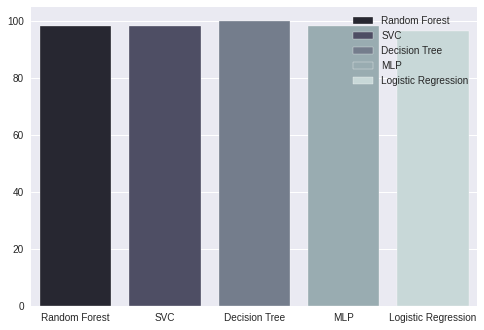

In [ ]:
sns.barplot(models, models_acc, palette="bone", hue=models, dodge=False)

In [ ]:
# conclusion
#considering only few features boost the accuracy where rfc, MLP and DTC give the highets accuracy of 100% while SVC gives 98.28%, Logreg giveS 94.83% of accuracy


In [ ]:
#  I need your support on the following
#cross validation of all the 5 ML techniques 
#how to interpret the confusion matrix of each model
#how to intepret the visualised model loss and accuracy
#How to find the True Positive, False Positve, True Negative and False Negative of each model
#how to implement the highest performing models

In [ ]:
#ROC

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold


In [ ]:
#Simulation

In [ ]:
#TESTING BEST MODEL FOR PREDICTION

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(df['htn'], df['classification'], random_state
count_vect = CountVectorizer()
X_valid_counts = count_vect.fit_transform(X_valid)
tfidf_transformer = TfidfTransformer()
X_valid_tfidf = tfidf_transformer.fit_transform(X_valid_counts)

SyntaxError: ignored

In [ ]:
age =24
dm =1.2
dfd=yes
rc =1
as a data frame

NameError: ignored

In [ ]:
d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


In [ ]:
d= {'sg': [1.020, 1.020, 1.010, 0.005], 'htn': [1, 0, 0, 1], 'dm': [2, 1, 2, 1,],'hemo': pd.Series([15.4, 11.3, 9.6,11.2], index=[0, 1, 2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

,sg,htn,dm,hemo
0,1.020,1,2,15.4
1,1.020,0,1,11.3
2,1.010,0,2,9.6
3,0.005,1,1,11.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2['class'], 
test_size = 0.33, random_state=44,
stratify= df2['class'] )

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
y_train.value_counts()

0    135
1    101
Name: classification, dtype: int64

In [ ]:
#Choosing parameters with GridSearchCV with 10-fold cross validations.
#(Suggestion for next time: try using Bayesian model selection method)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

In [ ]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_

Detailed classification report:


ValueError: ignored

In [ ]:
#Make predictions with the best model selected above
#I filled in all NaN with 0 and pass it to the trained classifier. The results are as follows:

#True positive = 180
#True negative = 35
#False positive = 0
#False negative = 27

In [ ]:
df = df.dropna(axis=0)
no_na = df.index.tolist()
some_na = df.drop(no_na).apply(lambda x: pd.to_numeric(x,errors='coerce'))
some_na = some_na.fillna(0) # Fill up all Nan by zero.

X_test = some_na.iloc[:,:-1]
y_test = some_na['class']
y_true = y_test
logreg_pred = clf_best.predict(X_test)
print(classification_report(y_true, logregr_pred))

confusion = confusion_matrix(y_test, logregr_pred)
print('Confusion Matrix:')
print(confusion)

print('Accuracy: %3f' % accuracy_score(y_true, logregr_pred))
# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf_best, X_test, y_test, 'RF')
 

ValueError: ignored